# Project Overview 
**Objective:** 
I aim to explore and learn exploratory data analysis(EDA) and clustering using a straightforward dataset. For EDA, I'll delve into descriptive statistics of numeric columns and create visualizations like Displots, box plots, and KDEs to illustrate the distribution of these variables. Additionally, I'll utilize a heatmap to discern correlations among different variables. Afterward, I'll dive into various clustering techniques—Univariate,Bivariate, and Multivariate, employing KMeans and assessing the clusters using metrics like inertia. Finally, I'll visualize the clusters on a scatter plot for a clearer understanding.


# Imports and Loading in the Data

In [1]:
# Import libraries 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load in data
df = pd.read_csv('https://raw.githubusercontent.com/felixr04/Mall-Customer-Segmentation/main/Mall_Customers.csv')

In [3]:
# Check size 
df.shape

(200, 5)

In [4]:
# Preview of df 
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Exploratory Data Analysis (EDA)

In [5]:
# Present quick stats for numeric cols
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


- Based on the stats above, the data from 200 mall customers shows ages spanning 18 to 70 years, with most customers between 28 and 49 years old. Their incomes range from $15,000 to $137,000, with a typical income around $61,500. Their spending scores range from 1 to 99, mostly between 34.75 and 73.

## Displots

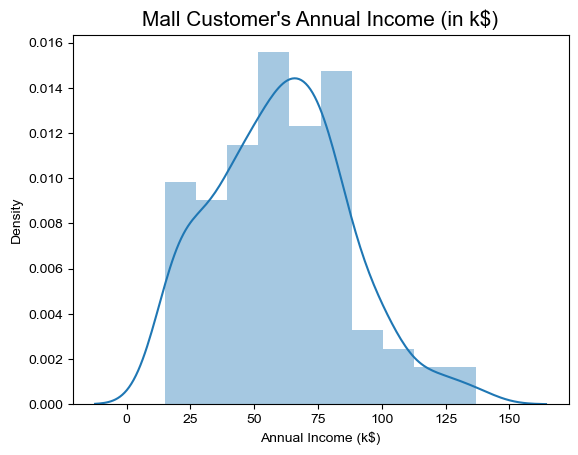

In [6]:
# Plot distribution of annual income of mall customers
sns.distplot(df['Annual Income (k$)'])
plt.title("Mall Customer's Annual Income (in k$)" , size = 15)
sns.set_theme(style="whitegrid")
plt.rcParams['font.family'] = 'serif';

In [7]:
# Create the same plot from above on remaining numeric cols
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

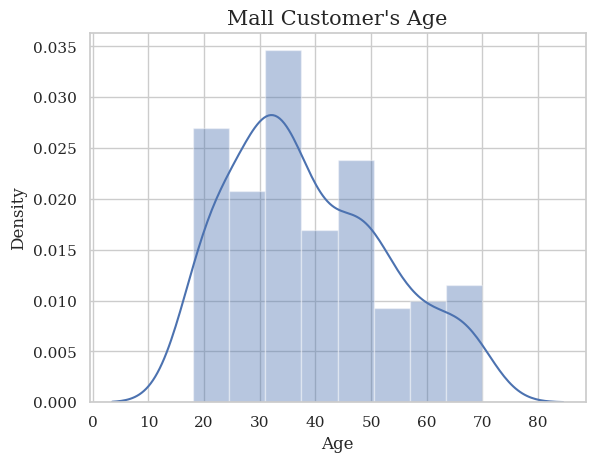

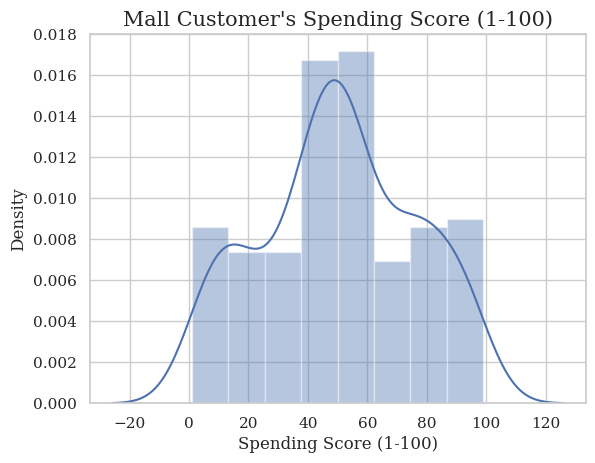

In [8]:
# For loop that creates the same plots for remaining numeric cols
columns = ['Age','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.distplot(df[i])
    plt.title(f"Mall Customer's {i}" , size = 15)

## Kdeplots

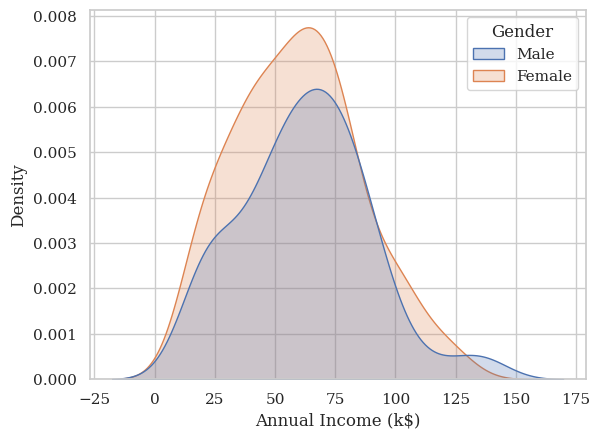

In [9]:
# Create another plot for showing a distribution
sns.kdeplot(data=df, x='Annual Income (k$)', hue="Gender", shade=True);

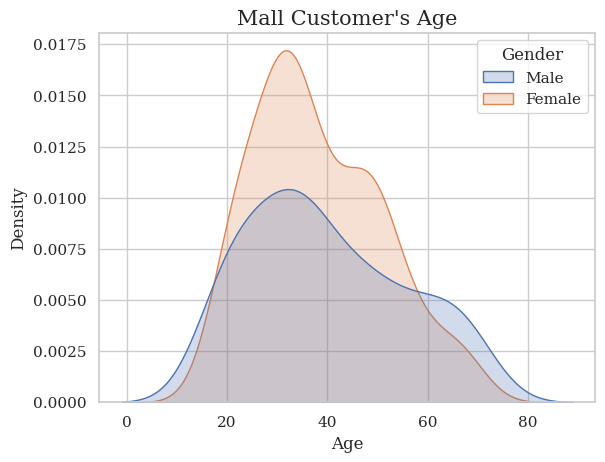

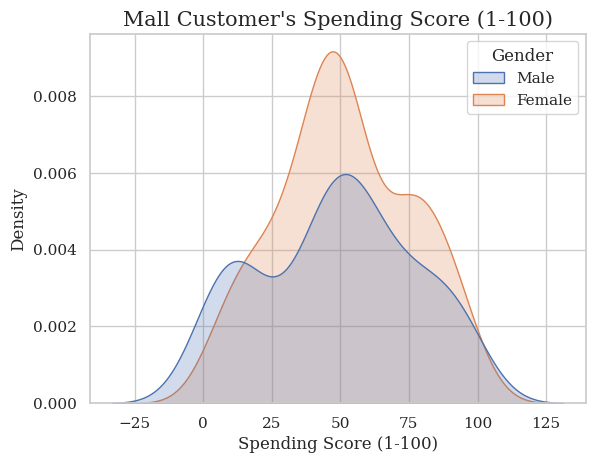

In [10]:
# Adapt the same for loop but for a kde plot 
columns = ['Age','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.kdeplot(data=df, x= i, hue="Gender", shade=True)
    plt.title(f"Mall Customer's {i}" , size = 15)

## Boxplots

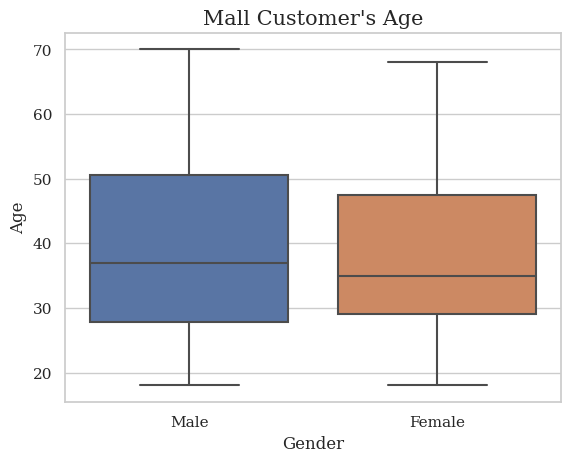

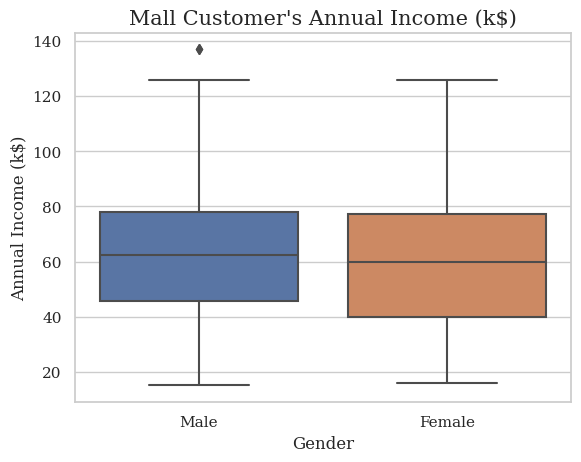

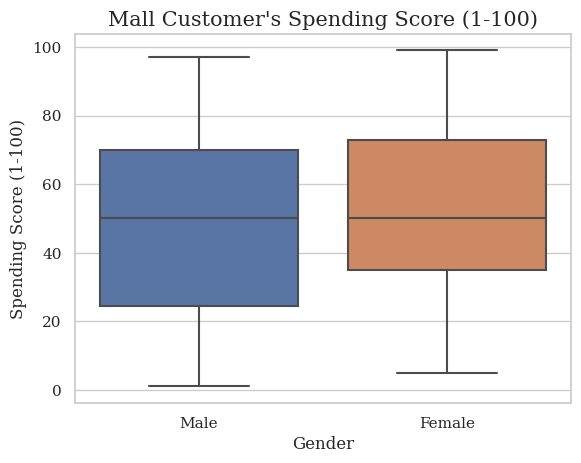

In [11]:
# Adapt the same for loop but for a boxplot 
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.boxplot(data=df, x = "Gender", y = i)
    plt.title(f"Mall Customer's {i}" , size = 15)

- Based on the graphs, it's evident that females generally exhibit higher spending scores than males, while having a narrower income range. Additionally, the data shows that female customers tend to be younger, whereas males tend to be older on average. These patterns are also evident in the KDE plots.

In [12]:
# Check out value counts for gender 
df['Gender'].value_counts(normalize=True)

Female    0.56
Male      0.44
Name: Gender, dtype: float64

- In this dataset ,there is a  greater representation of females within the sample in comparison to males.

## Bivariate Analysis

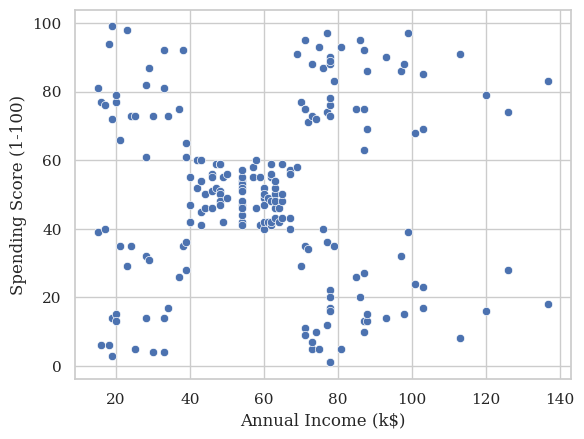

In [13]:
# Create a scatter plot to show the relationship between income and spending score 
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)');

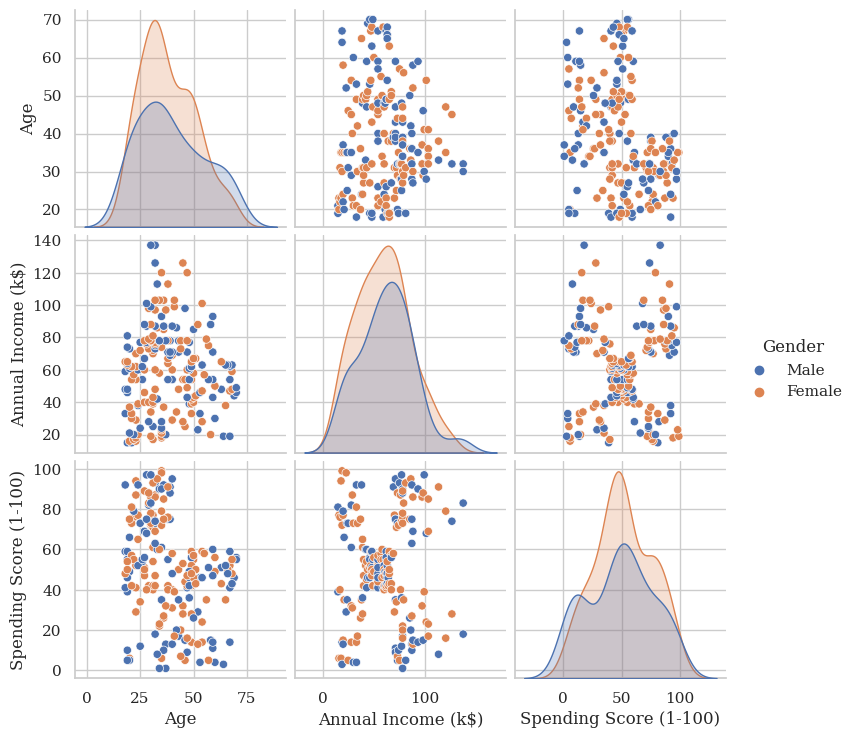

In [14]:
# Use pairplot to graph scatter and histograms for each variable expect customerID
df = df.drop('CustomerID', axis = 'columns')
sns.pairplot(data=df, hue='Gender');

In [15]:
# Using groupby calculate the mean values of age, income and spending score for each gender
df.groupby(['Gender'])['Age', 'Annual Income (k$)','Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [16]:
df.corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


<Axes: >

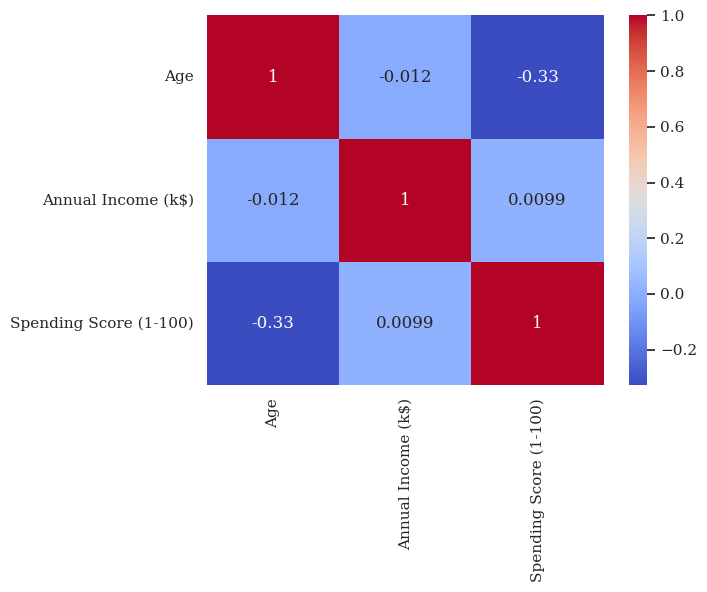

In [17]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

- The correlation matrix suggests a slight negative correlation between age and spending score while showing minimal correlations between age or annual income and annual income or spending score, respectively.

# Clustering - Univariate, Bivariate, Multivariate

In [18]:
# Instantiate Kmeans and set to 3 clusters
clustering1 = KMeans(n_clusters=3)

In [19]:
# Fit kmeans model 
clustering1.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=3)

In [20]:
# Take a look at the list of numbers where each number represents a cluster
clustering1.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [21]:
# Create a new col to show the respective cluster for each customer
df['Income Cluster'] = clustering1.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,Male,19,15,39,0
1,Male,21,15,81,0
2,Female,20,16,6,0
3,Female,23,16,77,0
4,Female,31,17,40,0


In [22]:
# Show how customer belong to each cluster
df['Income Cluster'].value_counts()

2    90
0    74
1    36
Name: Income Cluster, dtype: int64

In [23]:
clustering1.inertia_

23517.330930930926

In [24]:
# Create a for loop that calculates and stores the inertia scores for KMeans clustering (1-10 clusters) based on the 'Annual Income (k$)' column in the dataset.
inertia_scores = []
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)']])
    inertia_scores.append(kmeans.inertia_)

In [25]:
# Print results
inertia_scores

[137277.28,
 48660.88888888889,
 23528.152173913055,
 13278.112713472488,
 8493.229304029304,
 5050.904761904763,
 3955.2566544566544,
 2831.2960317460324,
 2171.472222222222,
 1787.9707792207794]

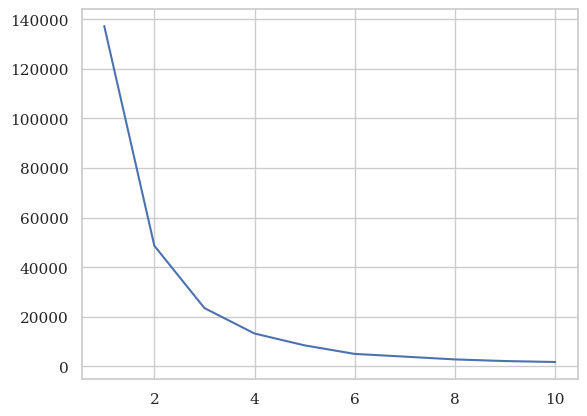

In [26]:
# Graph score to better interpret results
plt.plot(range(1,11), inertia_scores);

In [27]:
df.groupby('Income Cluster')['Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,39.500000,33.486486,50.229730
1,37.833333,99.888889,50.638889
2,38.722222,67.088889,50.000000


# Bivariate Clustering

In [28]:
# Repeat the same steps as above but try 5 cluster and use income and spending score 
clustering2 = KMeans(n_clusters=5)
clustering2.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
clustering2.labels_
df['Spending and Income Cluster'] = clustering2.labels_

df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,Male,19,15,39,0,2
1,Male,21,15,81,0,4
2,Female,20,16,6,0,2
3,Female,23,16,77,0,4
4,Female,31,17,40,0,2


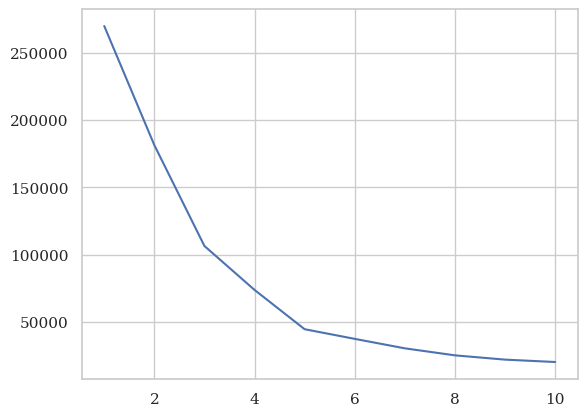

In [29]:
# Graph score to better interpret results
inertia_scores2 = []
for i in range(1,11):
    kmeans2=KMeans(n_clusters=i)
    kmeans2.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
    inertia_scores2.append(kmeans2.inertia_)
plt.plot(range(1,11), inertia_scores2)

In [30]:
centers = pd.DataFrame(clustering2.cluster_centers_)
centers.columns = ['x','y']

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

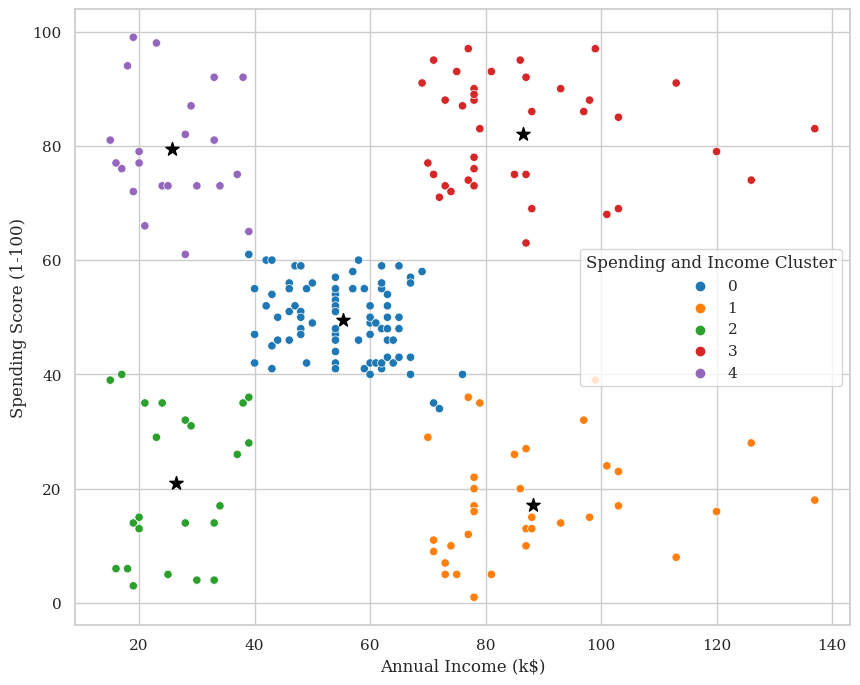

In [31]:
# Plot the clusters 
plt.figure(figsize = (10,8))
plt.scatter(x=centers['x'], y=centers['y'], s=100, c='black', marker='*')
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Spending and Income Cluster', palette = 'tab10')

In [32]:
pd.crosstab(df['Spending and Income Cluster'], df['Gender'], normalize='index')

Gender,Female,Male
Spending and Income Cluster,,
0,0.592593,0.407407
1,0.457143,0.542857
2,0.608696,0.391304
3,0.538462,0.461538
4,0.590909,0.409091


In [33]:
# Use group by to find the mean for the numeric columns for each cluster 
df.groupby('Spending and Income Cluster')['Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income Cluster,,,
0,42.716049,55.296296,49.518519
1,41.114286,88.200000,17.114286
2,45.217391,26.304348,20.913043
3,32.692308,86.538462,82.128205
4,25.272727,25.727273,79.363636


# Multivariate Clustering

In [34]:
# Import scaler
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

In [35]:
# Transform catergorical cols in df into binary columns
dff = pd.get_dummies(df,drop_first=True)
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster,Gender_Male
0,19,15,39,0,2,1
1,21,15,81,0,4,1
2,20,16,6,0,2,0
3,23,16,77,0,4,0
4,31,17,40,0,2,0


In [36]:
dff = dff[['Age', 'Annual Income (k$)', 'Spending Score (1-100)','Gender_Male']]
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [37]:
# Fit and transform df 
dff = scale.fit_transform(dff)

In [38]:
dff = pd.DataFrame(scale.fit_transform(dff))

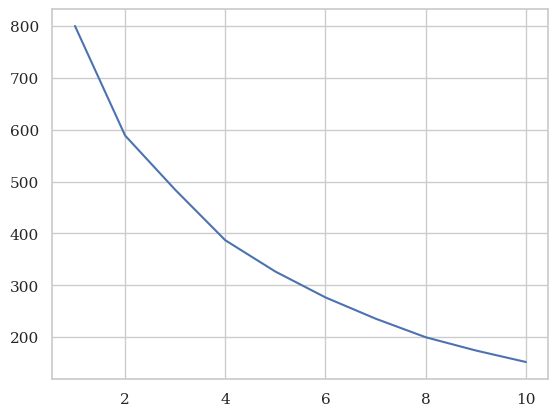

In [39]:
# Plot results 
inertia_scores3 = []
for i in range(1,11):
    kmeans3=KMeans(n_clusters=i)
    kmeans3.fit(dff)
    inertia_scores3.append(kmeans3.inertia_)
plt.plot(range(1,11), inertia_scores3);